# **Project Name**    - Global Terrorism Dataset



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name - Aditya A P**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
import inflect

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Function to extract the file to local colab storage from the shareable link
def get_link(url, filename):
  '''Downloads the file from the shareable drive link to the local colab storage. Returns the path'''
  print('Importing file from URL...')
  url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  path = '/content/' + filename
  gdown.download(url, path, quiet = True)
  print('Complete')
  return path

In [3]:
# Option to get file from shareable drive link or importing from drive
import_from_drive = False

if import_from_drive == True:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/Input data/Global Terrorism Data.csv'
else:
  url = 'https://drive.google.com/file/d/1WDL4nBf-e4JxL4lSIkkM3YLekN52uLKY/view?usp=drive_link'
  path = get_link(url, 'gtd.csv')

Importing file from URL...
Complete


In [4]:
# Load Dataset
df = pd.read_csv(path, encoding = 'ISO-8859-1')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns  in the dataset: {df.shape[1]}')

Number of rows in the dataset: 181691
Number of columns  in the dataset: 135


### Dataset Information

In [7]:
# Dataset Info
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f'Number of duplicated rows in the dataset: {df.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


It is expected that **eventid** column should have all unique values, as it represents a unique event of terrorism.

In [9]:
df['eventid'].duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(f'There are {df.isna().sum().sum()} missing values in the dataset\n\nThe columns which have missing values are:')
dfna = df.isna().sum()
print(dfna[dfna != 0])

There are 13853997 missing values in the dataset

The columns which have missing values are:
approxdate    172452
resolution    179471
provstate        421
city             434
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


In [11]:
# Visualizing the missing values of only columns with missing values
# plt.figure(figsize = (13, 10))
# sns.heatmap(df[dfna[dfna != 0].index].isna())

### What did you know about your dataset?

On a first look at the dataset, it is found that
*   There are **181691 rows and 135 columns**, out of which one is **eventid**, which is a primary key to the dataset.
*   There are **no duplicated data** in the dataset, and all values in **eventid** column are **unique**
*   There are **several missing values** in the dataset, since many of the columns are markers or counters which display null values when not necessary.
*   Due to the extremely large width of the dataset, only necessary columns will be chosen based on intelligent selection for Data Analysis. Null values shall be dealt with on this select features only.

## **2. Understanding Your Variables**

Since there are several columns in the dataset, it is cumbersome to analyse each of them in this section. Instead, part of **Data Wrangling** shall be done here so that only certain variables (deemed important for a proper EDA of the dataset) shall be selected.

First, those columns are filtered out which contain a large number of missing values (~15-20% of the column)

In [12]:
# Computing the percentage of missing values in each column
dfnan = df.isna().sum()*100/df.shape[0]

# Printing columns with less than 15% missing values
dfnan[dfnan < 15].index

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [13]:
# Selecting necessary columns for EDA
cols = [
        'eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
        'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt',
        'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'summary', 'motive'
       ]

data = df[cols].copy()

# Renaming columns appropriately
col_rename = {
              'iyear':'year', 'imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'gname':'group',
              'provstate':'state', 'attacktype1_txt':'attack_type', 'targtype1_txt':'target', 'weaptype1_txt':'weapon_type',
              'nkill':'killed', 'nwound':'wounded'
             }

data.rename(columns = col_rename, inplace = True)

*   Out of the above selected columns, the following are used only for referencing or if and when studying particular/specific cases, and are not primarily involved in the EDA:
  *   **month**
  *   **day**
  *   **provstate**
  *   **city**
  *   **latitude**
  *   **longitude**
  *   **summary**
  *   **motive**


In [14]:
# New missing values Count
print(f'There are {data.isna().sum().sum()} missing values in the new dataset\n\nThe columns which have missing values are:')
dfna = data.isna().sum()
print(dfna[dfna != 0])

There are 233851 missing values in the new dataset

The columns which have missing values are:
state           421
city            434
latitude       4556
longitude      4557
killed        10313
wounded       16311
summary       66129
motive       131130
dtype: int64


In [15]:
# Dataset Columns
print(f'There are {len(data.columns)} columns in the dataset.\nThey are:')
print(*data.columns, sep = '\n')

There are 20 columns in the dataset.
They are:
eventid
year
month
day
country
region
state
city
latitude
longitude
success
suicide
attack_type
target
group
weapon_type
killed
wounded
summary
motive


In [16]:
# Dataset Describe
data.describe()

,eventid,year,month,day,latitude,longitude,success,suicide,killed,wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000


From a brief description of the dataset, it can be observed that this dataset contains information of terrorist events from the year **1970** till **2017**. Also, as many as **1570** people have been killed in one particular terrorist event.

### Variables Description

The **[Global Terrorism Dataset](https://www.start.umd.edu/gtd/)** (or GTD for short) contains information on approximately 2,00,000 terrorist events across the globe spanning several years. Since the dataset is vast in terms of features for each terrorist event, only select features are considered here for EDA, and only their descriptions are provided below. Detailed description of each feature can be found in this [document](https://drive.google.com/file/d/1TLRkQDyLStykrjifbCqoMNVlXuk3LBAn/view?usp=sharing):

**NOTE**: The variables colour-coded with green background below are the "**primary variables**", i.e., variables which are primarily being used for the EDA.

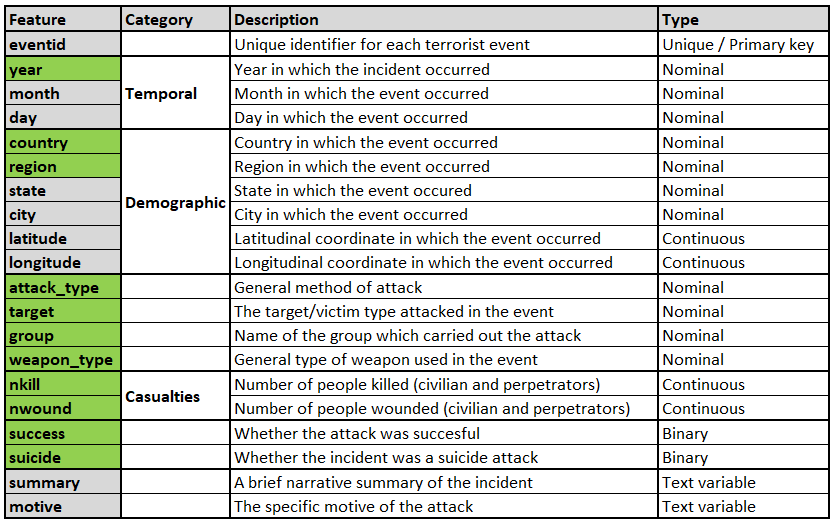

### Check Unique Values for each variable.

In [17]:
# Check Unique values for primary categorical variables
vars = ['year', 'country', 'success', 'suicide', 'attack_type', 'target', 'group', 'weapon_type']
for var in vars:
  to_print = 5
  suff = f'etc.. {data[var].nunique()} values' if data[var].nunique() > to_print else ''
  print(f'Unique values in "{var}" are: {sorted(data[var].unique())[:to_print]} {suff}')

Unique values in "year" are: [1970, 1971, 1972, 1973, 1974] etc.. 47 values
Unique values in "country" are: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'] etc.. 205 values
Unique values in "success" are: [0, 1] 
Unique values in "suicide" are: [0, 1] 
Unique values in "attack_type" are: ['Armed Assault', 'Assassination', 'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking'] etc.. 9 values
Unique values in "target" are: ['Abortion Related', 'Airports & Aircraft', 'Business', 'Educational Institution', 'Food or Water Supply'] etc.. 22 values
Unique values in "group" are: ['1 May', '14 K Triad', '14 March Coalition', '14th of December Command', '15th of September Liberation Legion'] etc.. 3537 values
Unique values in "weapon_type" are: ['Biological', 'Chemical', 'Explosives', 'Fake Weapons', 'Firearms'] etc.. 12 values


It can be roughly observed that the dataset contains information of terrorist attacks
* from **1970 to 2017**
* of **3537** distinct **organisations**
* using **various methods of attack** (such as **Bombing** and **Hijacking**)
* and a variety of **weapons** (such as **Explosives** and **Firearms**).
* The organisations also had quite a range of **targets** from **Airports** to **Educational Institutions**, some of them involving suicide attacks.

## **3. Data Wrangling**

Part of **Data Wrangling** has already been performed in the previous section in order to trim down the large number of variables. In this section:

*   Firstly handling of the large number of missing values in the dataframe is discussed, and a conclusion arrived upon based on a practical analysis.
*   In the second section, various new data (of types dataframes, series etc) are created from the original dataframe to facilitate for a smoother transition to data visualization. The types of data extracted are also discussed.

### 1. Handling missing values

*   As stated earlier, the dataset is segregated into two - **primary** and **secondary** features. Out of the total 21 columns, 8 are secondary and has been selected as a reference which may be useful only for a secondary EDA, and not primarily. Hence, none of the missing values from the secondary columns have to be imputed, which preserves data.
*  Hence, out of the 8 columns which contain missing values, only two are left which are primary variables - viz., **killed** and **wounded**.

In [18]:
# Checking missing values in nkill and nwound
print('Missing values in killed and wounded:')
print(data[['killed', 'wounded']].isna().sum())

tot_rows = data.shape[0]
n_rows = data.dropna(subset = ['killed', 'wounded']).shape[0]
print('\nNumber of rows of data lost on dropping these null values:', end = ' ')
print(f'{tot_rows - n_rows} or {round((tot_rows - n_rows)*100/tot_rows, 2)}%')

Missing values in killed and wounded:
killed     10313
wounded    16311
dtype: int64

Number of rows of data lost on dropping these null values: 16874 or 9.29%


In [19]:
# Plotting year-wise terrorism events with and without NA of nkill and nwound

def line_plots(to_plot_dfs, names = [None], figure_ = True, markers = True):
  '''Returns a figure which has the line-plot of plotly. Inputs are:
  the dataframes to plot, stored in a list; the names of each of the plots, also as a list;
  and a boolean to indicate whether the figure or the data to plot is to be returned'''
  to_plot = []
  if markers == True:
    for i in range(len(to_plot_dfs)):
      to_plot.append(go.Scatter(x = to_plot_dfs[i].index, y = to_plot_dfs[i].values, mode = 'lines+markers', marker = dict(symbol = 'circle', size = 8), name = names[i]))
  else:
    for i in range(len(to_plot_dfs)):
      to_plot.append(go.Scatter(x = to_plot_dfs[i].index, y = to_plot_dfs[i].values, name = names[i], mode = 'lines'))
  if figure_ == True:
    fig = go.Figure(data = to_plot)
    return fig
  return to_plot

yearly_df = data['year'].value_counts().sort_index()
yearly_dropna_df = data.dropna(subset = ['killed', 'wounded'])['year'].value_counts().sort_index()
names = ['With NA of killed and wounded', 'Dropping NA of killed and wounded']

fig = line_plots([yearly_df, yearly_dropna_df], names, True)
fig.update_layout(title = 'Yearly terrorism events - with and without dropping NA of killed and wounded',
                  yaxis_title = 'Number of terrorist events',
                  xaxis_title = 'Year',
                  autosize = False, width = 1300, height = 600)
fig.show()

*   It can be seen that there is signifcant loss of data on dropping the null values of **killed** and **wounded** (~9.3%) which is also reflected in a drop of terrorist activities across each year.
*   Since each row in the dataset corresponds to a terrorist event, any loss of information will have crucial effects in the analysis. Also, imputation of these missing values with any other value does not seem logical since (as per the document linked) "***this field remains blank when the figure is not reported or it is too vague to be of use***"
*   Hence, these null values shall not be dropped or tampered with, and the entire dataset will be used whenever **killed** and **wounded** are not included for analysis, while these null values will be ignored when the same 2 variables will be used for EDA.

### 2. Data Wrangling Code

In [20]:
# Creating a column for casualties
data['casualties'] = data['killed'] + data['wounded']
data['weapon_type'] = data['weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

data['weapon_type'].value_counts()

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: weapon_type, dtype: int64

In [21]:
# Creating a dataframe for number of terrorist events per year
yearly_df = data['year'].value_counts().sort_index()

# Creating a dataframe grouped by year and aggregating other variables by addition
yearly_sum = data.groupby('year').sum()

# Visualizing one as a sample
yearly_sum.head()

,eventid,month,day,latitude,longitude,success,suicide,killed,wounded,casualties
year,,,,,,,,,,
1970,128250997891467,3908,9685,20550.788172,-44920.817635,549,0,174.0,212.0,367.0
1971,92836955370915,2784,7137,17210.235146,-23633.523776,420,0,173.0,82.0,119.0
1972,112013627541685,3935,9631,24004.441063,-5828.724123,452,0,566.0,409.0,602.0
1973,93325992410863,3021,7141,15718.072031,-9899.455487,433,0,370.0,495.0,621.0
1974,114693333521304,3849,8870,19218.059261,-13098.568639,545,0,539.0,865.0,1122.0


In [22]:
# Creating a dataframe for number of terrorist events per region
region_df = data['region'].value_counts()
# Creating a dataframe grouped by region and aggregating other variables by addition
region_sum = data.groupby('region').sum()

# Repeating above steps of region column for country, group, attack type, weapon type and targets
country_df = data['country'].value_counts()
country_sum = data.groupby('country').sum()

group_df = data['group'].value_counts()
group_sum = data.groupby('group').sum()

attack_df = data['attack_type'].value_counts()
attack_sum = data.groupby('attack_type').sum()

weapon_df = data['weapon_type'].value_counts()
weapon_sum = data.groupby('weapon_type').sum()

target_df = data['target'].value_counts()
target_sum = data.groupby('target').sum()

In [23]:
# Visualizing the above two dataframes for one variable (region)
region_df.head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: region, dtype: int64

In [24]:
region_sum.head()

,eventid,year,month,day,latitude,longitude,success,suicide,killed,wounded,casualties
region,,,,,,,,,,,
Australasia & Oceania,56266844473918,562648,2001,4315,-6183.402968,4.142977e+04,240,1,150.0,260.0,409.0
Central America & Caribbean,2053258643230968,20531900,67112,154318,130397.455959,-8.700527e+07,9979,1,28708.0,8991.0,34530.0
Central Asia,112620069476242,1126163,3682,8742,22362.507788,2.995421e+04,505,11,1000.0,2009.0,2969.0
East Asia,159989598740527,1599842,5267,13072,27168.690470,9.692792e+04,680,17,1152.0,9213.0,10003.0
Eastern Europe,1032435740002632,10324011,33925,80426,235847.399370,1.899795e+05,4437,92,7415.0,12045.0,18239.0


In [25]:
# Creating dataframe consisting of number of events for each weapon type for top 3 attack types
attack_weapon_df = data.groupby(['attack_type', 'weapon_type']).count()['eventid']
top3attack_weapon = attack_weapon_df.loc[attack_df[:3].index].groupby('attack_type', group_keys = False).apply(lambda x: x.sort_values(ascending = False))
top3attack_weapon = top3attack_weapon.to_frame().rename(columns = {'eventid': 'number of events'})

# Visualizing the dataframe sample
top3attack_weapon.loc[attack_df[:2].index]

number of events
attack_type       weapon_type                         
Bombing/Explosion Explosives                     86791
                  Firearms                         756
                  Unknown                          413
                  Incendiary                       212
                  Chemical                          65
                  Melee                              6
                  Fake Weapons                       5
                  Other                              3
                  Sabotage Equipment                 2
                  Radiological                       1
                  Vehicle                            1
Armed Assault     Firearms                       36777
                  Incendiary                      2242
                  Explosives                      1982
                  Melee                           1510
                  Unknown                          144
                  Vehicle                            7
                  Other                              3
                  Chemical                           2
                  Sabotage Equipment                 2

In [26]:
# Creating dataframe consisting of number of events for each attack type for top 5 targets
target_attack_df = data.groupby(['target', 'attack_type']).count()['eventid']
top5target_attack = target_attack_df.loc[target_df[:5].index].groupby('target', group_keys = False).apply(lambda x: x.sort_values(ascending = False))
top5target_attack = top5target_attack.to_frame().rename(columns = {'eventid': 'number of events'})

# Visualizing the dataframe sample
top5target_attack.loc[target_df[:2].index]

number of events
target                      attack_type                                          
Private Citizens & Property Bombing/Explosion                               20144
                            Armed Assault                                   10848
                            Assassination                                    4234
                            Hostage Taking (Kidnapping)                      4226
                            Unknown                                          1867
                            Facility/Infrastructure Attack                   1601
                            Unarmed Assault                                   363
                            Hostage Taking (Barricade Incident)               146
                            Hijacking                                          82
Military                    Bombing/Explosion                               11879
                            Armed Assault                                   11102
                            Unknown                                          2228
                            Assassination                                    1591
                            Hostage Taking (Kidnapping)                       723
                            Facility/Infrastructure Attack                    318
                            Unarmed Assault                                    86
                            Hostage Taking (Barricade Incident)                34
                            Hijacking                                          23

In [27]:
# Top 4 countries with terrorist activities
countries = country_df.head(4).index

# Unmanipulated dataframes of specific countries stored in a dictionary
country_dict = {country: data[data['country'] == country] for country in countries}
# Dataframes of specific countries grouped by year
c_yearly_sum = {country: country_dict[country].groupby('year').sum() for country in countries}

# Data of specific countries consisting of number of terrorist events with each attack type, weapon type etc
c_attack_dict = {country: country_dict[country]['attack_type'].value_counts() for country in countries}
c_weapon_dict = {country: country_dict[country]['weapon_type'].value_counts() for country in countries}
c_target_dict = {country: country_dict[country]['target'].value_counts() for country in countries}
c_group_dict = {country: country_dict[country]['group'].value_counts() for country in countries}
c_city_dict = {country: country_dict[country]['city'].value_counts() for country in countries}

# Visualizing one of the above as a sample
print(c_attack_dict['Iraq'].head())

# Storing all data in a list
country_data = [country_dict, c_yearly_sum, c_attack_dict, c_weapon_dict, c_target_dict, c_group_dict, c_city_dict]

Bombing/Explosion              18286
Armed Assault                   3155
Assassination                   1287
Hostage Taking (Kidnapping)      946
Unknown                          765
Name: attack_type, dtype: int64


In [28]:
# Repeating the above process for specific terrorist groups instead of countries
groups = list(group_df.drop('Unknown').head(4).index) + ['Boko Haram', 'Al-Qaida', 'Communist Party of India - Maoist (CPI-Maoist)', 'Maoists', 'Sikh Extremists']

group_dict = {group: data[data['group'] == group] for group in groups}
g_yearly_sum = {group: group_dict[group].groupby('year').sum() for group in groups}

g_attack_dict = {group: group_dict[group]['attack_type'].value_counts() for group in groups}
g_weapon_dict = {group: group_dict[group]['weapon_type'].value_counts() for group in groups}
g_target_dict = {group: group_dict[group]['target'].value_counts() for group in groups}
g_country_dict = {group: group_dict[group]['country'].value_counts() for group in groups}
g_city_dict = {group: group_dict[group]['city'].value_counts() for group in groups}

# Visualizing one of the above as a sample
print(f"Taliban: Top 5 attack types:\n\n{g_attack_dict['Taliban'].head()}")

# Storing all data in a list
group_data = [group_dict, g_yearly_sum, g_attack_dict, g_weapon_dict, g_target_dict, g_country_dict, g_city_dict]

Taliban: Top 5 attack types:

Bombing/Explosion              2866
Armed Assault                  2125
Unknown                         966
Hostage Taking (Kidnapping)     713
Assassination                   508
Name: attack_type, dtype: int64


### What all manipulations have you done?

Various manipulations were made in the original dataframe in this section to ready the data for data visualization. They included:
*   Creating a column named **casualties** to combine the **killed** and **wounded** variables, to help better visualize the effect of terrorism in just one variable thereby making the process easier.
*   Creating dataframes by **grouping the classes of the categorical variables**, and taking the **count of eventid** and **summing the numerical variables**.
*   As part of **bivariate analysis**, creating dataframes of the most used **weapon types** for the **top-5 attack types** used by terrorists. Top 5 is chosen due to the presence of multiple classes of both the variables.
*   Similarly, computing the most used **attack methods** for a particular target of terrorists.

*   The above are manipulations of the entire dataframe. As part of studying local countries of interest and specific high-impact terrorist organisations, separate dataframes were created for each of these countries and terrorist organisations.
*   Each of the above manipulations were made for each specific groups and countries (e.g., the most used attack types, most targeted types etc.) for undertanding the specific motives and geographical areas of interest, among others, of particular terorrist groups and also studying the specific characteristics of countries of interest.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Introduction

* The dataset is analysed in three separate sections, each of which contain multiple sub-sections.
*   **NOTE:** The total number of terrorist events, casualties (killed and wounded), number of suicide attacks, and successful attacks are called the **"Impact" metrics**, which highlights the effect of terrorism. These four metrics will be used in every section commonly.
*   **NOTE 2:** All of these analyses are performed both for temporaly aggregated and year-wise data.
*   **NOTE 3:** The key observations from each of the plots are recorded as **KEY TAKEAWAYS** in the sections, also referred in this project as **KT**
*   **In the first part**, the entire dataset is considered for analysis (named **Global Analysis**) , with all countries of attack and all terrorist organisations, to understand the general characteristics of terrorist attacks and their effect on the populace. Each of the analysis performed in this section (and more) is performed in the 2nd and 3rd sections. The first section contains the following analyses:
  1. **General yearly analysis**
  2. **Dempgraphic (Regional) analysis**
  3. **Demographic (National) analysis**
  4. **General analysis of terrorism organisations**
  5. **Analysis of attack types, weapon types** - and the different weapons used for specific attack types
  6. **Analysis of target types** - and the different attack types used for specific targets

*   **The second section** is a **Local Analysis**, on a subset of the dataset, of specific countries of interest. These countries are chosen based on the heatmap and/or the plots which display hot-spots of terrorist activities. The countries chosen are:
  1. **Iraq**
  2. **Afghanistan**
  3. **Pakistan**
  4. **India**

*   **The third and final section** contains analysis of **two specific terrorist organisations**, selected based on their notoreity, popularity and impact of terrorism. They are:
  1. **Taliban**
  2. **The Islamic State of Iraq and the Levant (ISIL)**
  3. Brief analysis of a few terrorist organisations such as **Shining Path**, **Boko Haram** etc.

### 1. Global Analysis

#### Chart 1 - Yearly analysis

##### 1. Plots

In [32]:
# Plotting the distribution of terrorist events by year
fig = line_plots([yearly_df])
fig.update_layout(title = 'Yearly terrorism events', yaxis_title = 'Number of terrorist events', xaxis_title = 'Year',
                  autosize = False, width = 1100, height = 600)
fig.show()

In [33]:
# Dataframe for number of casualties by year
cas_cols = ['killed', 'wounded', 'casualties']
yearly_sum[cas_cols].sort_values(cas_cols, ascending = False).head()

,killed,wounded,casualties
year,,,
2014,44490.0,41128.0,68853.0
2015,38853.0,44043.0,72833.0
2016,34871.0,40001.0,69225.0
2017,26445.0,24927.0,48208.0
2013,22273.0,37688.0,57679.0


In [34]:
# Plotting the number of killed and wounded by year
yr_kw_list = [yearly_sum[var] for var in cas_cols[:-1]]
fig = line_plots(yr_kw_list, ['Number of people killed', 'Number of people wounded'])
fig.update_layout(title = 'Yearly casualties due to terrorism', yaxis_title = 'Number of people', xaxis_title = 'Year',
                  autosize = False, width = 1300, height = 600)
fig.show()

In [35]:
# Plot of number of people killed, wounded, and total casualties
for var in cas_cols:
  text = f'people {var}' if var != 'casualties' else var
  # Plots
  line_traces = line_plots([yearly_sum[var]], [f'Number of {text}'], figure_ = False)
  avg_trace = go.Bar(x = yearly_sum.index, y = (yearly_sum[var] / yearly_df), yaxis = 'y2', name = f'Average {text} per event', marker = dict(opacity = 0.5, color = '#00CC96'))
  fig = go.Figure(data = [*line_traces, avg_trace])
  # Updating the layout
  fig.update_layout(title = f'Yearly total and average number of {text}', xaxis_title = 'Year',
                    yaxis_title = 'Number of people', yaxis2 = dict(title = 'Avg number of people', overlaying = 'y', side = 'right'),
                    autosize = False, width = 1400, height = 600)
  fig.show()

In [36]:
# Dataframe for number of succesful and suicide events by year
cols = ['success', 'suicide']
yearly_sum[cols].sort_values(cols, ascending = False).head()

,success,suicide
year,,
2014,15015,744
2015,12676,922
2016,10975,985
2013,10484,622
2017,8652,844


In [37]:
# Plotting the successful and suicide events by year
texts = ['successful events', 'suicide events']
vars = ['success', 'suicide']
for text, var in zip(texts, vars):
  to_plot_df = [yearly_sum[var], yearly_df, ] if var == 'success' else [yearly_sum[var]]
  yrange = [78, 100] if var == 'success' else [0, 12]
  line_traces = line_plots(to_plot_df, [f'Number of {text}', 'Number of events'], figure_ = False)
  success_trace = go.Bar(x = yearly_sum.index, y = (yearly_sum[var]/yearly_df * 100), yaxis = 'y2', name=f'Percentage of {text}', marker=dict(opacity = 0.4, color = '#00CC96'))
  fig = go.Figure(data = [*line_traces, success_trace])
  fig.update_layout(title = f'Yearly {text}', xaxis_title = 'Year', yaxis_title = 'Number of events', yaxis2 = dict(title = f'Percentage', overlaying = 'y', side = 'right'),
                    yaxis2_range = yrange, autosize = False, width = 1400, height = 600)
  fig.show()

##### 2. Why did you pick the specific chart?

Library used for plots:
*   For EDA in this project, **plotly** has been used primarily instead of **matplotlib** (despite the simplicity of the latter) because of the interactive interface of plotly. Interactive visualizations allow users to explore and interact with data directly in the plot. This can be especially helpful when dealing with large datasets, as users can zoom, pan, hover over data points, and more to extract insights.

Type of plots:
*   For the temporal visualization, **line plots** have been used for their simplicity and ability in showing trends and changes over time. The continuous lines connect data points in chronological order, helping to emphasize the temporal progression.
*   For displaying percentages or averages overlaying with the temporal lineplots, the **box-plots** with adjusted opacity have been used to avoid cluttering and for improving interpretability.



##### 3. What is/are the insight(s) found from the chart?

This chart is a basic general temporal chart to visualize the dataset from a higher level. The features **killed, wounded, casualties, success** and **suicide** are parameters to measure the impact of a terrorist attack, and hence shall be used in every Chart.
1.   The **first plot** shows the **number of terrorist events across the years**. It can be observed that the number of terrorist events **gradually increased** till **1992**, after which it **dropped** till **2004**. Then there was a **steep rise** in number of terrorist activities till it **peaked in 2014**, after which it has **considerably decreased** till **2017**.
2.   Keeping in line with this trend, the **second plot** shows a **similar pattern** for number of people **killed and wounded**. But there is a **local peak at 2001**, the year which had less number of terrorist events. This means high number of casualties in few number of attacks, possibly due to the famous 9/11 in New York, This will be concluded in the upcoming charts.
3.   Following this, the **third plot** shows the **average number of killed/wounded/casualties per event every year** as an overlay with the total number every year. It can be seen that the **average number of casualties per event is the maximum in 2001** followed by 2004. The former is possibly the effect of the 9/11 attacks. In 2004 the number of attacks were less, but casualties per attack were high. **The number of casualties per attack has significantly decreased since then, despite increase in number of events.**
4.   The **fourth plot** is similar to the third one, but for events which are deemed as **success** or events which involve **suicide attacks**. Both the number and percentage of successful attacks has also reduced significantly in 21st century, while the percentage of suicide attacks has increased manifold which was almost rare in 20th century.


**NOTE**: **success** is defined (as in the document in variable descriptions in previous section) based on the tangible effects of the attack, and not in terms of the larger goals/motives of the perpetrators.

**KEY TAKEAWAYS:**
1.   Exponentially increasing number of terrorist attacks in 21st century, along with the casualties.
2.   Sudden increase in the number and percentage of suicide attacks in the 21st century.
3.   2001 showed a peak in number of casualties despite lesser number of attacks, possibly due to the 9/11 attacks in NYC

#### Chart 2 - Demographic (Regional) analysis

##### 1. Plots

In [38]:
# Plotting region-wise distribution of terrorist attacks, suicide attacks and casualties
texts = ['terrorist events', 'suicide terrorist events', 'casualties']
for var, text in zip([None, 'suicide', 'casualties'], texts):
  region_plot_df = region_df if var == None else region_sum[var].sort_values(ascending = False)
  region_plot = go.Bar(x = region_plot_df.index, y = region_plot_df.values)
  fig = go.Figure(data = region_plot)
  fig.update_layout(title = f'Region-wise distribution of {text}', xaxis_title = 'Region', yaxis_title = f'Number of {text.split(" ")[-1]}',
                    autosize = False, width = 1200, height = 600)
  fig.show()

In [39]:
def multi_cat_lineplot(names_toplot, toplot_dict, title, var = ''):
  '''Plots multiple line plots of multiple categories in a given variable over time
  Inputs are - the names of the categories to plot in an iterable (like list),
  Dictionary of the data to plot, with keys as the category name and value as the data,
  the type of variable, which needs to be displayed in the title (e.g, "regions", "groups" etc),
  and finally, the name of the impace metric - ("casualties", "suicide" etc - blank if it is number of events)'''

  # Checking if the plot is for total number of events, or others such as casualties or suicide events
  events = True if var == '' else False
  if events == True:
    categ_toplot = list({k: toplot_dict[k] for k in names_toplot}.values())
  else:
    categ_toplot = list({k: toplot_dict[k][var] for k in names_toplot}.values())

  # Plot
  fig = line_plots(categ_toplot, names_toplot, markers = False)
  var = 'terrorism' if var == '' else var
  var = var + ' events' if var != 'casualties' else var
  fig.update_layout(title = f'Yearly {var} across different {title}', yaxis_title = f'Number of {var}', xaxis_title = 'Year',
                    autosize = False, width = 1400, height = 650)
  fig.show()

# Plotting region-wise distribution of terrorist attacks across each year
region_names = data['region'].unique()[::-1]
region_names_tp = [region for region in region_names if region not in ['East Asia', 'Central Asia', 'Australasia & Oceania']]
region_year_dict = {region: data[data['region'] == region]['year'].value_counts().sort_index() for region in region_names}

multi_cat_lineplot(region_names_tp, region_year_dict, 'regions')

In [40]:
# Plotting region-wise distribution of casualties across each year
region_yr_sum_dict = {region: data[data['region'] == region].groupby('year').sum() for region in region_names}
multi_cat_lineplot(region_names_tp, region_yr_sum_dict, 'regions', 'casualties')

In [41]:
# 9/11 attacks
df_911 = data[(data['region'] == 'North America') & (data['year'] == 2001) & (data['month'] == 9) & (data['day'] == 11)][cas_cols + ['region', 'country', 'city', 'target', 'attack_type']]
print(f"Total casualties in 9/11 attacks = {int(df_911['casualties'].sum())}")
print(f"Total casualties in North America in 2001 = {int(data[(data['region'] == 'North America') & (data['year'] == 2001)]['casualties'].sum())}\n")
df_911.head()

Total casualties in 9/11 attacks = 19494
Total casualties in North America in 2001 = 19541



,killed,wounded,casualties,region,country,city,target,attack_type
73126,1384.0,8190.0,9574.0,North America,United States,New York City,Private Citizens & Property,Hijacking
73127,1383.0,8191.0,9574.0,North America,United States,New York City,Private Citizens & Property,Hijacking
73128,190.0,106.0,296.0,North America,United States,Arlington,Government (General),Hijacking
73129,44.0,6.0,50.0,North America,United States,Shanksville,Private Citizens & Property,Hijacking


In [42]:
# Plotting region-wise distribution of suicide events across each year
multi_cat_lineplot(region_names_tp, region_yr_sum_dict, 'regions', 'suicide')

##### 2. Why did you pick the specific chart?

*   To visualise the distribution of the total number events, casualties and suicide attacks across regions (cumulated over all time), the **bar plots** have been used. When temporal factor comes into play, the lineplots have been bought back.
*   This is because unlike the line plots, barplots do not intend to highlight the trend between different values of the x-coordinate, which is required in temporal analysis. Instead, the barplot helps the user analyse the categories independently.

##### 3. What is/are the insight(s) found from the chart?

*   In the first plot, it can be observed that the **Middle East**, **South Asia** and **Sub-Saharan Africa** top the lists of most number of terrorist events, most casualties and most suicide attacks. **South America** shows very high terrorist activity, but lesser number of casualties.
*   From the temporal distribution of terrorist events, it can be observed that the second half of the 20th century saw major terrorist attacks in **Western Europe** at first, followed by **Central** and **Southern America**. The 21st century saw a sudden rise in terrorist activities in the **Middle East**, **South Asia** and **African** regions, as reflected in **KT_1.1**
*   This similar trend is also reflected in the yearly plot of casualties. But there is a huge peak in 2001 in **North America**, which is as hypothesised in the previous chart (**KT_1.3**) as well. This has indded been concluded to be from the 4 attacks in NYC in 9/11. Almost all the casualties in the year 2001 in North America are from this particular terrorist attack.
*   In the final plot, it can be observed that even though there were several terrorist attacks in 20th century, almost none of them were suicide attacks. But this changed in the 21st century where several attacks in **South Asia**, **Middle-east** and **African** regions were through suicide attacks, as observed in **KT_1.2**


**KEY TAKEAWAYS:**
1.   **Middle East**, **South Asia** and **Sub-Saharan Africa** are terrorist hotspots, which started peaking from the 21st century. These regions also witness **suicide** attacks, which are almost absent in other regions.
2.   The terrorist attack of 9/11 had a major impact in terms of casualties. Just this one terrorist incident (involving four attacks) claimed almost 19000 casualties, with a third of them killed.  

##### 4. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 3 - Demographic (National) analysis

##### 1. Plots

In [43]:
# Top 20 countries in terms of terrorist events, suicide events and casualties
texts = ['terrorist events', 'casualties', 'suicide terrorist events']
for var, text in zip([None, 'casualties', 'suicide'], texts):
  country_plot_df = country_df.head(20) if var == None else country_sum[var].sort_values(ascending = False).head(20)
  country_plot = go.Bar(x = country_plot_df.index, y = country_plot_df.values)
  fig = go.Figure(data = country_plot)
  fig.update_layout(title = f'Country-wise distribution of {text} (top-20)', xaxis_title = 'Country', yaxis_title = f'Number of {text.split(" ")[-1]}',
                    autosize = False, width = 1200, height = 600)
  fig.show()

In [44]:
# Choropleth map coloured by number of terrorist events
def plot_world(df, title_):
  '''Plots a heatmap of the world using plotly choropleth, weights as per the input
  Inputs require the dataset (with index as the country names and values as the weights),
  and the title of the map as a string'''
  fig = px.choropleth(df, locations = df.index, locationmode = 'country names', color = df.values,
                    hover_name = df.index, projection = 'natural earth', color_continuous_scale="Viridis")
  fig.update_layout(title = title_)
  fig.show()

plot_world(country_df, 'Map of number of terrorist events')

In [45]:
# Choropleth map coloured by number of casualties
country_cas = country_sum['casualties'].sort_values(ascending = False)
plot_world(country_cas, 'Map of number of casualties')

In [46]:
# Choropleth map coloured by number of suicide events
country_sui = country_sum['suicide'].sort_values(ascending = False)
plot_world(country_sui, 'Map of number of suicide events')

In [47]:
# Yearly terrorism events across top 10 countries
country_names = list(country_df.head(10).index)
country_year_dict = {country: data[data['country'] == country]['year'].value_counts().sort_index() for country in country_names}

multi_cat_lineplot(country_names, country_year_dict, 'countries')

In [48]:
# Yearly terrorism casualties across top 10 countries
country_names = list(country_sum['casualties'].sort_values(ascending = False).head(10).index)
country_yr_sum_dict = {country: data[data['country'] == country].groupby('year').sum() for country in country_names}

multi_cat_lineplot(country_names, country_yr_sum_dict, 'countries', 'casualties')

In [49]:
# Yearly suicide events across top 10 countries
country_names = list(country_sum['suicide'].sort_values(ascending = False).head(10).index)
country_yr_sum_dict = {country: data[data['country'] == country].groupby('year').sum() for country in country_names}

multi_cat_lineplot(country_names, country_yr_sum_dict, 'countries', 'suicide')

##### 2. Why did you pick the specific chart?

*   Similar to the previous chart, the **line and barplots** have been used to visualize the number of events, casualties and suicide attacks across each country. Lineplots have been used when there is temporal factor.
*   Since there is large number of countries, all of them can not be displayed in the bar or line plots. Hence, the **choropleth** plots have been used to visualize in a global map.


##### 2. What is/are the insight(s) found from the chart?

*   Continuing from the previous chart, **Iraq**, **Afghanistan**, **Pakistan** and **India** tops the list in being terrorist hotspots, all of them lying within the top regions of **Middle-East** and **South Asia**.
*   This is also reflected in the choropleth heatmapIt can also be observed that the United States has a relatively high number of casualties with ~24000 in number, but almost 80% of the casualties come from one incident (as concluded in **KT_2.2**)
*   Continuing from the previous chart, there was high terrorist activities in the countries of **United Kingdom**, **El Salvador** and **Peru** in the 20th century. The 21st century witnessed several terrorist attacks in **Iraq**, **Pakistan**, **Afghanistan** and **India**, which are also reflected in the yearly distribution of casualties.

**KEY TAKEAWAYS:**
1. **Iraq**, **Pakistan**, **Afghanistan** and **India** are terrorist hot-spots in 21st century, witnessing large number of attacks and casualties. (Hence, these four countries shall be of special study in the upcoming sections).
2. Suicide attacks were also more frequently used as a method of attack in these countries.
3. The terrorist hotspots in 20th century were primarily in the **United Kingdom**, **El Salvador** and **Peru**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 4 - Analysis of Terrorist Organisations

##### 1. Plots

In [50]:
# Head of dataset of terrorist groups with most attacks
group_df.head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: group, dtype: int64

A vast majority of the events are by **Unknown** groups, hence for the sake of visualization they shall be put away.

In [51]:
# Plotting the terrorist group-wise distribution of total terrorist events, suicide attacks and casualties
texts = ['terrorist events', 'suicide terrorist events', 'casualties']
for var, text in zip([None, 'suicide', 'casualties'], texts):
  group_plot_df = group_df[1:].head(20) if var == None else group_sum[var].sort_values(ascending = False)[1:].head(20)
  group_plot = go.Bar(x = group_plot_df.index, y = group_plot_df.values)
  fig = go.Figure(data = group_plot)
  fig.update_layout(title = f'Terrorist group-wise distribution of {text}', xaxis_title = 'Terrorist group', yaxis_title = f'Number of {text.split(" ")[-1]}',
                    autosize = False, width = 1200, height = 600)
  fig.show()

In [52]:
# Creating a dataframe with success percentage of top-20 terrorist groups with with respect to number of attacks
var = 'success'
groups_toplot = group_sum[var].sort_values(ascending = False)[1:].head(20)

group_success_pct = groups_toplot / group_df[groups_toplot.index] * 100
group_success_pct.sort_values(ascending = False).to_frame().rename(columns = {0: 'Percentage of success'}).head(10)

,Percentage of success
group,
Nicaraguan Democratic Force (FDN),98.994413
Farabundo Marti National Liberation Front (FMLN),98.985377
Liberation Tigers of Tamil Eelam (LTTE),95.267746
Shining Path (SL),95.214050
Communist Party of India - Maoist (CPI-Maoist),94.462194
National Liberation Army of Colombia (ELN),94.170404
Kurdistan Workers' Party (PKK),94.155844
Tehrik-i-Taliban Pakistan (TTP),93.782383
Boko Haram,92.928040


In [53]:
# Plotting success events and percentage of success for top 20 groups
def pct_success_plot(df_toplot, pct_df, var, pct_range):
  '''Plots a bar-line overlay plot for each category of the input dataframe, with the bars indicating
  number of successful events and the lines indicating percentage of successful events
  Inputs include the dataframe with successful events as values and the classes as index,
  second dataframe with percentage of success for the same clases, the type of class ("group", "attack type" etc),
  and the axis range of the percentage plot as a list'''
  bar_trace = go.Bar(x = df_toplot.index, y = (df_toplot), yaxis = 'y2', name = 'Total successful events', marker = dict(opacity = 0.5, color = '#00CC96'))
  line_trace = line_plots([pct_df], names = ['Percentage of success'], figure_ = False, markers = False)

  fig = go.Figure(data = [*line_trace, bar_trace])
  fig.update_layout(title = f'Percentage and Total successful events for each {var}', xaxis_title = var,
                    yaxis_title = 'Percentage of success', yaxis2 = dict(title = 'Total success events', overlaying = 'y', side = 'right'),
                    yaxis_range = pct_range, autosize = False, width = 1400, height = 650)
  fig.show()

pct_success_plot(groups_toplot, group_success_pct, 'group', [70, 100])

In [113]:
# Yearly terrorism events of top 10 groups
group_names = list(group_df[1:].head(10).index)
group_year_dict = {group: data[data['group'] == group]['year'].value_counts().sort_index() for group in group_names}
multi_cat_lineplot(group_names, group_year_dict, 'groups')

In [55]:
# Yearly terrorism casualties, suicide events and successful events of top 10 groups in respective fields
for var in ['casualties', 'success', 'suicide']:
  group_names = list(group_sum[var].sort_values(ascending = False)[1:].head(10).index)
  group_yr_sum_dict = {group: data[data['group'] == group].groupby('year').sum() for group in group_names}

  multi_cat_lineplot(group_names, group_yr_sum_dict, 'groups', var)

##### 2. Why did you pick the specific chart?

*   Similar to previous charts, **bar plots** were used to visualize the causalties/number of attacks/suicide attacks for each group and **line plots** were used whenever the temporal factor came into play.
*   The number of successful events and its percentage were overlay in the same graph for better reading, and hence a **combination of line and bar plots** were used.

##### 3. What is/are the insight(s) found from the chart?

*   In the first plot, it can be visualised that the **Taliban** and **ISIL** top the lists of most number of casualties, suicide attacks and overall attacks in general. While **Shining Path** and **FMNL** had significant number of attacks, they had lesser number of casualties. **Al-Qaida** despite not even featuring in the top-20 groups in terms of number of attacks, had way more casualties primarily because of the 9/11 which alone claimed ~20k casualties as concluded before.
*   The yearly distribution of terrorist attacks correspond to the point observed in **KT_3.3**, which saw high terrorist attacks in **United Kingdom**, **El Salvador** and **Peru**. Here, high terrorist activities can be observed by the **Irish Republican Army(IRA)**, **Shining Path** and **FMNL**.
  *   The **[IRA](https://en.wikipedia.org/wiki/Provisional_Irish_Republican_Army#:~:text=an%20Irish%20republican%20paramilitary%20force%20that%20sought%20to%20end%20British%20rule%20in%20Northern%20Ireland)** is a group which sought to end the **British rule in Northern Ireland**. This is reflected in both the charts.
  *   **[FMNL](https://en.wikipedia.org/wiki/Farabundo_Mart%C3%AD_National_Liberation_Front#:~:text=The%20FMLN%20was%20formed%20as,the%20Partido%20Revolucionario%20de%20los)** is a terrorist group emerging from the civil-war in **El-Salvador**
  *   **[Shining Path](https://en.wikipedia.org/wiki/Shining_Path)** was a far-left guerilla terrorist group, which in the late half of the 20th century had motives to overthrow the Peruian government.
*   The 21st century saw the sudden rise of **Taliban** and **ISIL**, the latter from as late as 2013. The countries mentioned in **KT_3.1** were most affected by them. They, along with **Boko Haram** frequently used suicide attack as their methodology.

**KEY TAKEAWAYS:**
1. **Taliban** and **ISIL** are the most prominent terrorist organisations with maximum impact in terms of casualties and number of terrorist attacks. (These 2 groups primarily, will be studied specifically in the upcoming sections)
2. The countries which were terrorist hotspots in late half of 20th century (as observed in **KT_3.3**) had the **IRA**, **FMNL** and **Shining Path** as the respective terrorist groups. (This is further corroborated in the final section where two of the groups here are specifically anaylsed)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 5 - Analysis of Attack Types and Weapon Types

##### 1. Plots

In [56]:
# Pie chart depicting proportions of each attack/weapon type used in terrorist events
for df, text in zip([attack_df, weapon_df], ['Attack Type', 'Weapon Type']):
  fig = go.Figure(data = go.Pie(values = df.values, labels = df.index))
  fig.update_layout(title = f'Proportions of each {text} on total terrorist events', autosize = False, width = 1300, height = 550)
  fig.show()

In [57]:
# Pie chart depicting proportions of attack and weapon types used in suicide attacks
for df, text in zip([attack_sum, weapon_sum], ['Attack Type', 'Weapon Type']):
  sui_df = df['suicide'].sort_values(ascending = False)
  fig = go.Figure(data = go.Pie(values = sui_df.values, labels = sui_df.index))
  fig.update_layout(title = f'Proportions of each {text} for suicide attacks', autosize = False, width = 1300, height = 550)
  fig.show()

In [58]:
# Plotting success events and percentage of success for attack types
attack_success = attack_sum['success'].sort_values(ascending = False)
attack_success_pct = attack_success / attack_df[attack_success.index] * 100
pct_success_plot(attack_success, attack_success_pct, 'attack type', [30, 100])

In [59]:
# Plotting the total number of casualties per attack and weapon type
for df, text in zip([attack_sum, weapon_sum], ['Attack Type', 'Weapon Type']):
  cas_df = df['casualties'].sort_values(ascending = False)
  fig = go.Figure(data = go.Bar(x = cas_df.index, y = cas_df.values))
  fig.update_layout(title = f'Casualties per {text}', xaxis_title = text, yaxis_title = 'Number of casualties}',
                    autosize = False, width = 1200, height = 600)
  fig.show()

In [60]:
# Proportions of weapon types used for top 3 attack types
top3_attacks = {index[0] for index in top3attack_weapon.index}
for var in top3_attacks:
  fig = go.Figure(data = go.Pie(values = top3attack_weapon.loc[var]['number of events'], labels = top3attack_weapon.loc[var].index))
  fig.update_layout(title = f'Proportions of each weapon type for {var} attacks', autosize = False, width = 1300, height = 550)
  fig.show()

Since an almost one-to-one correspondence can be observed between the top-attack types and weapon types (**Bombing/Explosion - Explosives, Armed Assault - Firearms** etc), only attack type will now be primarily focused upon.

In [61]:
# Yearly terrorism events across different attack types
attack_yr_dict = {attack_type: data[data['attack_type'] == attack_type]['year'].value_counts().sort_index() for attack_type in list(attack_df.index)}
multi_cat_lineplot(list(attack_df.index), attack_yr_dict, 'Attack Types')

In [62]:
# Yearly terrorism casualties and successful events across different attack types
for var in ['casualties', 'success']:
  attack_yr_sum_dict = {attack_type: data[data['attack_type'] == attack_type].groupby('year').sum() for attack_type in list(attack_df.index)}
  multi_cat_lineplot(list(attack_df.index), attack_yr_sum_dict, 'attack types', var)

##### 2. Why did you pick the specific chart?

Answer Here.

##### 3. What is/are the insight(s) found from the chart?

*   It can be observed that about half of the terrorist attacks carried out have been through **Bombing/Explosives**, which corresponds to **Explosives** being the most used (~50%) weapon.
*   For suicide attacks, almost always **Explosives** have been used, with an overwhelming 94% of suicide attacks involving them.
*   As for the success rates, **Assassinations** had a relatively lower success rate (75%) compared to **Bombings** and **Armed Assaults**. This is to be expected as per the definition of **success** in this dataset explained earlier.
*   The one-to-one correspondence between attack type and weapon type is confirmed in the next chart where almost all of **Bombing** and **Armed Assault** attacks involved usage of **Explosives** and **Firearms**.
*   **Bombing** and **Armed Assault** have always remained the top atack types used by terrorists in both the 20th and 21st century.
*    The effect of 9/11 can again be observed in the yearly plot of casualties, where there is a sudden peak in the **Hijacking** method of terrir attack.

**KEY TAKEAWAYS**
1.   **Bombings** and **Armed Assaults** are an overwhelming favourite of terrorists as a method of their attack, with most of suicide attacks also involving the former.
2.   A one-to-one correspondence can be observed between attack type and weapon type, hence the former shall be primarily focused on for this project.

**NOTE:** Combinations of Terrorist organisations and groups with attack/weapon types are not studies in this section, but when the specific country/groups are analysed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 6 - Analysis of Target Types

##### 1. Plots

In [63]:
# Proportions of different targets of terrorists
fig = go.Figure(data = go.Pie(values = target_df.values, labels = target_df.index))
fig.update_layout(title = f'Proportions of each target of terrorists', autosize = False, width = 1300, height = 550)
fig.show()

In [64]:
# Different targets of suicide attacks
sui_df = target_sum['suicide'].sort_values(ascending = False)
fig = go.Figure(data = go.Pie(values = sui_df.values, labels = sui_df.index))
fig.update_layout(title = f'Proportions of targets of suicide attacks', autosize = False, width = 1300, height = 550)
fig.show()

In [65]:
# Plotting success events and percentage of success for different targets of terrorists
target_success = target_sum['success'].sort_values(ascending = False)
target_success_pct = target_success / target_df[target_success.index] * 100
pct_success_plot(target_success, target_success_pct, 'target', [30, 100])

In [66]:
# Plotting the total casualties per target
target_cas_df = target_sum['casualties'].sort_values(ascending = False)
fig = go.Figure(data = go.Bar(x = target_cas_df.index, y = target_cas_df.values))
fig.update_layout(title = 'Casualties per target', xaxis_title = text, yaxis_title = 'Number of casualties}',
                  autosize = False, width = 1200, height = 600)
fig.show()

In [67]:
# Yearly number of terrorist events across top 10 targets
target_names = list(target_df.head(10).index)
target_yr_dict = {target: data[data['target'] == target]['year'].value_counts().sort_index() for target in target_names}
multi_cat_lineplot(target_names, target_yr_dict, 'targets')

In [68]:
# Yearly terrorism casualties and suicide events across top 10 targets
for var in ['casualties', 'success', 'suicide']:
  target_names = list(target_sum[var].sort_values(ascending = False).head(10).index)
  target_yr_sum_dict = {target: data[data['target'] == target].groupby('year').sum() for target in target_names}
  multi_cat_lineplot(target_names, target_yr_sum_dict, 'targets', var)

Following the one-to-one correspondence concluded between the attack types and weapon types in **KT_5.2**, only one of them shall be analysed in combination with the target type. Here, attack type is chosen for top 5 targets of terrorists

In [69]:
# Proportions of types of attack types used for top 5 targets
top5_targets = {index[0] for index in top5target_attack.index}
for var in top5_targets:
  fig = go.Figure(data = go.Pie(values = top5target_attack.loc[var]['number of events'], labels = top5target_attack.loc[var].index))
  fig.update_layout(title = f'Distribution of types of attack for {var} target', autosize = False, width = 1300, height = 550)
  fig.show()

##### 2. Why did you pick the specific chart?

Answer Here.

##### 3. What is/are the insight(s) found from the chart?

*   It can be observed that most of the attacks by terrorist groups are on **Private Citizens and Properties**, followed by **Military**, **Police**, **Government** and **Business** institutions. The same pattern is also followed by the number of casualties.
*   On the other hand, most of th suicide attacks were on **Military** and **Police** followed by **Private Properties** and **Government** institutions.
*   In terms of success percentage, the terrorist groups achieved either 90% or more on almost all target types except **Government** institutions where they witnessed lower success.
*   The same trends are also followed in the temporal distributions for number of attacks per year and number of casualties. The effect of 9/11 attacks can be visualised here too, where the number of casualties peaked in the year 2001 for the target type of **Private Citizens and Properties**
*   In analysing the top attack types used for some common terrorist targets:
  *   Miiltary - **Bombings** and **Armed Assaults**
  *   Government - **Bombings**, **Assassinations** and **Armed Assaults**
  *   Business - Overwhelmingly **Bombings**
  *   Police - **Bombings** and **Armed Assaults**
  *   Private Citizens - **Bombings** and **Armed Assaults**

**KEY TAKEAWAYS:**
1. A favourite of terrorists is to target **Private Citizens and Properties**, **Military** and **Police**, followed by **Government** and **Business**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### 2. Local Analysis

As observed in **KT_3.1**, the four countries which had the most terrorist activities are **Iraq**, **Afghanistan**, **Pakistan** and **India**. These four countries are hence specifically chosen for more in-depth analysis

#### Chart 7 - Iraq

In [70]:
def generate_plots(cg_name, plot_type, cg_dict, cg_yearly_sum, cg_attack_dict, cg_weapon_dict, cg_target_dict, cg_gc_dict, cg_city_dict):
  '''Generate specific plots for a particular group/country, including (a) yearly total and successful events
  (b) yearly casualties (c) yearly events across top 5 countries/groups (based on whether the plot is for a group/country)
  (d) Proportions of each attack type, (e) weapon type and (f) Targets (g) Percentage of suicide attacks, and finally
  (h) Top 10 cities of terorrist activity in the country (it is only plot if the plot_type is country)
  Inputs include the country/group name, the plot type (country or group), and dictionaries of countries/groups containing data for the above plots'''

  # Yearly total and successful events
  title_text = 'in ' + cg_name if plot_type == 'country' else 'by ' + cg_name
  cg_events = cg_dict[cg_name]['year'].value_counts().sort_index()
  cg_success = cg_yearly_sum[cg_name]['success'].sort_index()
  fig = line_plots([cg_events, cg_success], ['Number of terrorist events', 'Number of successful events'])
  fig.update_layout(title = f'Yearly terrorist events and successful terrorist events {title_text}', yaxis_title = 'Number of events', xaxis_title = 'Year',
                    autosize = False, width = 1300, height = 600)
  fig.show()

  # Yearly casualties
  yr_kw_list = [cg_yearly_sum[cg_name][var] for var in ['killed', 'wounded']]
  fig = line_plots(yr_kw_list, ['Number of people killed', 'Number of people wounded'])
  fig.update_layout(title = f'Yearly casualties {title_text} due to terrorism', yaxis_title = 'Number of people', xaxis_title = 'Year',
                    autosize = False, width = 1300, height = 600)
  fig.show()

  # Yearly terrorist attacks across top 5 countries/groups
  var = 'country' if plot_type == 'group' else 'group'
  cg_names = list(cg_gc_dict[cg_name].head(5).index)
  cg_year = {cou_group: cg_dict[cg_name][cg_dict[cg_name][var] == cou_group]['year'].value_counts().sort_index() for cou_group in cg_names}
  multi_cat_lineplot(cg_names, cg_year, f'{inflect.engine().plural(var)} (top 5) {title_text}')

  # Proportions of each attack type, weapon type and target type in the country or by the group
  awt_list = [cg_gc_dict[cg_name][:10], cg_attack_dict[cg_name], cg_weapon_dict[cg_name], cg_target_dict[cg_name]]
  texts = [f'of top 10 {inflect.engine().plural(var).capitalize()}', 'Attack Type', 'Weapon Type', 'Target Type']
  for df, text in zip(awt_list, texts):
    fig = go.Figure(data = go.Pie(values = df.values, labels = df.index))
    fig.update_layout(title = f'Proportions of each {text} on total terrorist events {title_text}', autosize = False, width = 1300, height = 550)
    fig.show()

  # Proportions of suicide attacks
  suicide_plot = cg_dict[cg_name]['suicide'].map({0: 'Non-suicide attack', 1: 'Suicide attack'}).value_counts()
  fig = go.Figure(data = go.Pie(values = suicide_plot.values, labels = suicide_plot.index))
  fig.update_layout(title = f'Percentage of suicide attacks {title_text}', autosize = False, width = 1300, height = 550)
  fig.show()

  # Top 10 cities in terms of terrorist attacks in the country
  if plot_type == 'country':
    top10_cities = cg_city_dict[cg_name].head(10)
    fig = go.Figure(data = go.Bar(x = top10_cities.index, y = top10_cities.values))
    fig.update_layout(title = f'Top 10 cities with terrorist activities in {cg_name}', xaxis_title = 'City', yaxis_title = 'Number of terrorist events',
                      autosize = False, width = 1200, height = 600)
    fig.show()

In [71]:
def generate_heatmap(cg_name, cg_dict, gjson_path, cities = False, zoom_ = 5):
  '''Generates a geographic heatmap of the terrorist attacks in the country/by the group, with the top 5 cities as an optional
  Inputs include the country/group name, the dictionary containing the complete dataset of the specific country/group,
  path to the geoJSON file, boolean for whether the cities should be plot or not, and the initial zoom state (default = 5)
  '''

  # Top 5 cities with terrorist activities
  top5_cities = cg_dict[cg_name]['city'].value_counts().head(5).index
  if 'Unknown' in top5_cities:
    top5_cities = cg_dict[cg_name]['city'].value_counts().head(5).drop('Unknown').index
  top5_city_data = cg_dict[cg_name].groupby('city').first()[['latitude', 'longitude']].loc[top5_cities]
  coords = [(row['latitude'], row['longitude']) for index, row in top5_city_data.iterrows()]
  coordinates = (top5_city_data.head(1)['latitude'].values[0], top5_city_data.head(1)['longitude'].values[0])

  # Create a map centered around the country/city with top activity
  c_map = folium.Map(location = coordinates, zoom_start = zoom_, tiles = None, control_scale = True, prefer_canvas = True, background_color = 'white',
                        scrollWheelZoom = False)
  state_style = {'fillColor': 'white', 'color': 'black', 'weight': 1, 'fillOpacity': 1}
  folium.GeoJson(gjson_path, style_function = lambda feature: state_style).add_to(c_map)

  # Marking the coodinates of the top 5 cities
  if cities == True:
    c=1
    for label, coord in zip(top5_cities, coords):
      folium.Marker(location = coord, icon = folium.Icon(color='red'), popup = f'{c}. {label}').add_to(c_map)
      c+=1

  # Plotting the heatmap in the map
  country_map = cg_dict[cg_name][['latitude', 'longitude']].dropna()
  heat_coords = [(row['latitude'], row['longitude']) for index, row in country_map.iterrows()]
  HeatMap(heat_coords, radius = 10, blur = 8, max_zoom = 1).add_to(c_map)
  display(c_map)

In [72]:
# Generating required plots for Iraq
generate_plots('Iraq', 'country', *country_data)

In [73]:
# Checking on the high number of casualties in 2004
iraq_df = country_dict['Iraq']
iraq_df[iraq_df['year'] == 2007].sort_values('casualties', ascending = False)[['month', 'day', 'city', 'attack_type', 'target', 'casualties', 'group', 'motive']].head(10)

,month,day,city,attack_type,target,casualties,group,motive
84018,8,14,Jazeera,Bombing/Explosion,Private Citizens & Property,1000.0,Al-Qaida in Iraq,Unknown
84010,8,14,Qahtaniya,Bombing/Explosion,Private Citizens & Property,1000.0,Al-Qaida in Iraq,Unknown
82739,3,27,Tal Afar,Bombing/Explosion,Private Citizens & Property,500.0,Unknown,Targeting of Shi i Citizens
83789,7,7,Amerli,Bombing/Explosion,Private Citizens & Property,400.0,Unknown,Unknown
82299,2,3,Baghdad,Bombing/Explosion,Private Citizens & Property,366.0,Unknown,Unknown
82719,3,30,Tal Afar,Hostage Taking (Kidnapping),Private Citizens & Property,315.0,Unknown,Retaliation for earlier bombings in Tal Afar
82722,3,30,Tal Afar,Bombing/Explosion,Private Citizens & Property,315.0,Unknown,Unknown
82534,3,6,Hillah,Bombing/Explosion,Private Citizens & Property,292.0,Islamic State of Iraq (ISI),Unknown
83669,6,19,Baghdad,Bombing/Explosion,Religious Figures/Institutions,279.0,Unknown,Unknown
82883,4,18,Baghdad,Bombing/Explosion,Private Citizens & Property,275.0,Al-Qaida in Iraq,Unknown


In [74]:
# Reading the geoJSON file
filename = 'iraq1.geojson'
if import_from_drive == True:
  path_gj = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/geoJSON/' + filename
else:
  path_gj = get_link('https://drive.google.com/file/d/1qkLbEc1HB9zaX9ww3DCoy58HlBVfemtt/view?usp=drive_link', filename)

# Generating the heatmap
generate_heatmap('Iraq', country_dict, path_gj, cities = True, zoom_ = 6)

Importing file from URL...
Complete


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the plots, it can be observed that:
*   Iraq saw a **rise in terrorist activities** only in the **21st century**. It had almost negligible proportion of world's terrorist attacks in the 20th century. This is also reflected in the sudden rise of casualties in the 21st century. Especially in the years of **2007** (which saw the famous Yazidi community bombings as part of the Iraq war) and **2014** (31000 casualties from ~4000 attacks). The latter is especially due to the start of the **Iraqi war** where the **ISIL** had captured large territories of Iraq.
*   Majority of the terror attacks are by unknown groups (~75%), but from the rise of ISIL in 2014, they have become a prominent terror group in Iraq with large number of attacks and casualties.
*   The most common attack types used in Iraq are **Bombings** and **Armed Assaults**, which is also reflected in the most used weapon types being **Explosives** and **Firearms**
*   The most common targets of terror groups in Iraq were the **Private Citizens & Properties**, **Police**, **Military**, **Government** and **Business**, in that order.
*   Suicide attacks were quite common among Iraqi terror attacks - about 1 in every 10 attack were suicide attacks.
*   Finally, the cities within Iraq which were terrorist hotspots were **Baghdad** (which overwhelmingly lead the number of terror attacks in Iraq) and **Mosul**, followed by others such as Kirkuk and Baqubah.
*   These cities are also marked in the heatmap that displays the frequency of terrorist attacks within the map of Iraq.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 8 - Afghanistan

In [75]:
# Generating required plots for Afghanistan
generate_plots('Afghanistan', 'country', *country_data)

In [76]:
# Reading the geoJSON file
filename = 'Afghanistan1.geojson'
if import_from_drive == True:
  path_gj = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/geoJSON/' + filename
else:
  path_gj = get_link('https://drive.google.com/file/d/1JfvhbUEYISVStFuoMJKn2YAgzej2hFrt/view?usp=drive_link', filename)

# Generating the heatmap
generate_heatmap('Afghanistan', country_dict, path_gj, cities = True, zoom_ = 6)

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the plots, it can be observed that:
*   Similar to Iraq, Afghanistan had almost no record of terrorist attacks in the 20th century, and saw a **rise in terrorist activities** only in the **21st century**. This is also reflected in the plot of casualties.
*   Majority of the terror attacks are by **Taliban** (~58%), after they were found in mid to late 1990s and their rise to prominence in the beginning of the 21st century. Several attacks have also gone unclaimed and are hence recorded to be by Unknown terrorist groups
*   Similar to Iraq, the most common attack types used in Afghanistan are **Bombings** and **Armed Assaults**, which is also reflected in the most used weapon types being **Explosives** and **Firearms**
*   The most common targets of terror groups in Iraq were the **Police**, followed by **Private Citizens & Properties**, **Military** and **Government**.
*   Suicide attacks were quite common among Afghani terror attacks as well - about 1 in every 10 attack were suicide attacks.
*   Finally, the cities within Iraq which were terrorist hotspots were **Kabul** and **Kandahar**, followed by others such as Jalalabad and Ghazni.
*   These cities are also marked in the heatmap that displays the frequency of terrorist attacks within the map of Afghanistan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 9 - Pakistan

In [77]:
# Generating required plots for Pakistan
generate_plots('Pakistan', 'country', *country_data)

In [78]:
# Checking on the high number of casualties in the year 1987
pak_df = country_dict['Pakistan']
pak_df[pak_df['year'] == 1987].sort_values('casualties', ascending = False)[['month', 'day', 'city', 'attack_type', 'target', 'casualties', 'group']].head()

,month,day,city,attack_type,target,casualties,group
31545,7,14,Karachi,Bombing/Explosion,Transportation,375.0,Unknown
30554,3,23,Islamabad,Bombing/Explosion,Government (General),109.0,Unknown
30209,2,19,Peshawar,Bombing/Explosion,Private Citizens & Property,70.0,Unknown
31466,7,5,Lahore,Bombing/Explosion,Transportation,55.0,Unknown
31815,8,11,Mardan,Bombing/Explosion,Transportation,52.0,Unknown


In [79]:
# Reading the geoJSON file
filename = 'pakistan1.geojson'
if import_from_drive == True:
  path_gj = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/geoJSON/' + filename
else:
  path_gj = get_link('https://drive.google.com/file/d/1ITonFRKHpP5XstPXZLLrOlY0MZXB62ev/view?usp=drive_link', filename)

# Generating the heatmap
generate_heatmap('Pakistan', country_dict, path_gj, cities = True, zoom_ = 6)

Importing file from URL...
Complete


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the plots, it can be observed that:
*   Pakistan too had **rise in terrorist activities** only in the **21st century**, with a lone peak in the year of 1995 in the 20th century. This trend is reflected in the plot of casualties, except for the year 1987 which saw a locak peak. This is because of the famous **Karachi car bombings** which claimed a lot of lives.
*   Majority of the terror attacks are by unknown groups (~80%), but the early 2000s onwards witnessed rise in **Tehrik-i-Taliban Pakistan (TTP)**.
*   Again, the most common attack types used are **Bombings** and **Armed Assaults**, which is also reflected in the most used weapon types being **Explosives** and **Firearms**.
*   The most common targets of terror groups in Pakistan were the **Private Citizens & Properties**, **Police**, **Military**, **Government** and **Business**, in that order.
*   Suicide attacks are not as common in Pakistani terror attacks as in Iraq and Afghanistan - about 3% of total terror attacks were suicide attacks.
*   Finally, the city within Pakistan which had most terrorist attacks is **Karachi** (which overwhelmingly lead the number of terror attacks in Pakistan)followed by **Peshawar**, **Quetta** and **Lahore**.
*   These cities are also marked in the heatmap that displays the frequency of terrorist attacks within the map of Pakistan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 10 - India

In [80]:
# Generating required plots for India
generate_plots('India', 'country', *country_data)

In [111]:
# Checking on the peak in casualties in 2006
india_df = country_dict['India']
india_df[india_df['year'] == 2006].sort_values('casualties', ascending = False)[['month', 'day', 'city', 'attack_type', 'target', 'casualties', 'group', 'summary']].head()

,month,day,city,attack_type,target,casualties,group,summary
81098,7,11,Mumbai,Bombing/Explosion,Transportation,1005.0,Lashkar-e-Taiba (LeT),07/11/2006: A series of train bombings killed ...
80105,3,7,Varanasi,Bombing/Explosion,Religious Figures/Institutions,120.0,Unknown,03/07/2006: A previously unknown Kashmiri grou...
80049,2,28,Dantewada district,Bombing/Explosion,Private Citizens & Property,75.0,Communist Party of India - Maoist (CPI-Maoist),02/28/2006: Suspected Communist Party of India...
81881,11,20,Belacoba,Bombing/Explosion,Transportation,68.0,Unknown,11/20/2006: A bomb planted on an Indian passen...
81797,11,6,Guwahati,Bombing/Explosion,Business,65.0,United Liberation Front of Assam (ULFA),"11/06/2006:Twin explosions in Guwahati, India ..."


In [88]:
# Reading the geoJSON file
filename = 'india2.geojson'
if import_from_drive == True:
  path_gj = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/geoJSON/' + filename
else:
  path_gj = get_link('https://drive.google.com/file/d/11jYwI4q3cjU8FQS1JpWnoZl3HOVetsY2/view?usp=drive_link', filename)

# Generating the heatmap

generate_heatmap('India', country_dict, path_gj, cities = True, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

In [89]:
# Generating heatmap for CPI Maoist attacks in India
print(groups[-3])
generate_heatmap(groups[-3], group_dict, path_gj, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

In [90]:
# Generating heatmap for Maoist attacks in India
print(groups[-2])
generate_heatmap(groups[-2], group_dict, path_gj, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

In [91]:
# Generating heatmap for Sikh Extremist attacks in India
print(groups[-1])
generate_heatmap(groups[-1], group_dict, path_gj, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the plots, it can be observed that:
*   Even though India had relatively lesser terrorist activities in the 20th cen. compared to the 21st, there is still significant terrorist attacks in the same time period. Prominent number of Terrorist attacks can be witnessed in **1984**, **late 1980s to early 1990s**, and a sudden increase **from late 2000s** onwards.
*   This trend is also visible in the first half of plot of casualties, except for the **unusual peak in 2006**, which is credited to the **series of Mumbai train explosions by Lashkar-e-Taiba (LeT) terrorist group**, which claimed over a thousand casualties. In the latter half of the plot of casualties, it can be observed that despite larger number of terrorist attacks, there is a significant decrease in casualties.
*   Majority of the terror attacks are by unknown groups (~45%), followed by the **Communist** and **Maoist** groups which are known to have conducted several terrorist attacks in number, if not of the same magnitude of organisations such as the **LeT**. The high number of attacks in the 1980s are attributed to the several attacks by **Sikh Extremists**, while **Communist** and **Maoist** attacks were very frequent from **2005** onwards.
*   The most common attack types used in India are **Bombings** and **Armed Assaults**, which is also reflected in the most used weapon types being **Explosives** and **Firearms**
*   The most common targets of terror groups in Iraq were the **Private Citizens & Properties**, **Police**, **Government**, **Business**,and **Military** in that order.
*   Compared to the other countries considered in this study, India has much lower rate of suicide attacks, with only 0.5% of attacks being suicide attacks.
*   Finally, the cities within India which had the most terrorist attacks were **Sringaar** and **Imphal** followed by **New Delhi** and **Amritsar**.
*   These cities are also marked in the heatmap that displays the frequency of terrorist attacks within the map of India. The subsequent heatmaps show the regions of activities of a few top terrorist groups of **India**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### 3. Analysis of specific terrorist organisations

As observed in **KT_4.1**, two terrorist groups had very prominent terror activities, especially in the 21st century. They were, the **Taliban** and **ISIL**, and these two groups are specifically chosen for further analysis similar to previous section for countries.

#### Chart 11 -Taliban

In [112]:
# Generating required plots for Taliban
generate_plots('Taliban', 'group', *group_data)

In [117]:
# Reading the geoJSON file
filename = 'world1.geojson'
if import_from_drive == True:
  path_gj = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 4 - EDA/geoJSON/' + filename
else:
  path_gj = get_link('https://drive.google.com/file/d/1dxE2lf8E6P3OXunld6M_x9C_QZuYGtFK/view?usp=drive_link', filename)

# Generating the heatmap
generate_heatmap('Taliban', group_dict, path_gj, cities = True, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the plots it can be observed that
*   The **Taliban** gained prominence from late 1990s, which is reflected in the increase in total number of terrorist attacks from around this time. The same trend is observed in the plot of casualties.
*   The Taliban almost completely operates within **Afghanistan**, with 99.3% of its attacks within the country. Hence its temporal trend within the country is similar to the same observed in the analysis of the **Afghanistan** country in the previous section.
*   Typical method used by Taliban for terrorist attacks are **Bombings** and **Armed Assaults/Firearms**
*   The Taliban typically targeted the **Police** the most, followed by **Military**, **Private Citizens & Property** and the **Government** institutions.
*   Almost 10% of their terrorist attacks involved suicide attacks.
*   Finally, the heatmap of their areas of terrorist activity validates they are almost exclusively active in Afghanistan, and a few areas of Pakistan


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 12 - Islamic State of Iraq and the Levant (ISIL)

In [114]:
# Generating required plots for ISIL
generate_plots(groups[1], 'group', *group_data)

In [118]:
# Generating the heatmap
generate_heatmap(groups[1], group_dict, path_gj, cities = True, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

*   ISIL as a terror group became active as late as 2013, and their terror activities and casualties have only been in the rise till 2017. As noted in **KT_4.1** they are the most active terrorist group as of the latest data in this dataset
*   Almost all of their activities are contained within **Iraq** and **Syria** (~ 86 and ~10% respectively), with a small proportion (1.5%) in **Turkey**
*   ISIL predominantly relies on **Bombings and Explosives** as their mode of attack and weapon type. Only 10% of their attacks involve use of **Firearms**
*   ISIL typically targets **Private Citizens & Property** the most, followed by **Military**, **Police** and **Business** institutions.
*   An overwhelming 25% of their attacks (~1/4th) involve usage of suicide attack tactics.
*   The geographical heatmap shows the most active regions of ISIS, as validated earlier - **Iraq**, **Syria** and some parts of **Turkey**.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart 13 - Few other terrorist groups

In this section, few other terorrist groups of interest are very briefly analysed for their regions of activities. The groups are:
*   Al-Qaida
*   Shining Path
*   FMLN
*   Boko Haram



##### 1. Al-Qaida

In [ ]:
# Countries attacked by Al-Qaida
group_name = groups[-1]
fig = go.Figure(data = go.Pie(values = g_country_dict[group_name].values, labels = g_country_dict[group_name].index))
fig.update_layout(title = f'Countries attacked by {group_name}', autosize = False, width = 1300, height = 550)
fig.show()

In [ ]:
# Generating a heatmap
generate_heatmap(groups[-1], group_dict, path_gj, zoom_ = 3)

Output hidden; open in https://colab.research.google.com to view.

##### 2. Shining Path

In [ ]:
# Countries attacked by Shining Path
group_name = groups[2]
fig = go.Figure(data = go.Pie(values = g_country_dict[group_name].values, labels = g_country_dict[group_name].index))
fig.update_layout(title = f'Countries attacked by {group_name}', autosize = False, width = 1300, height = 550)
fig.show()

In [ ]:
# Generating a heatmap
generate_heatmap(groups[2], group_dict, path_gj, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

##### 3. FMLN

In [ ]:
# Countries attacked by FMLN
group_name = groups[3]
fig = go.Figure(data = go.Pie(values = g_country_dict[group_name].values, labels = g_country_dict[group_name].index))
fig.update_layout(title = f'Countries attacked by {group_name}', autosize = False, width = 1300, height = 550)
fig.show()

In [ ]:
# Generating a heatmap
generate_heatmap(groups[3], group_dict, path_gj, zoom_ = 6)

Output hidden; open in https://colab.research.google.com to view.

##### 4. Boko Haram

In [ ]:
# Countries attacked by Boko Haram
group_name = groups[-2]
fig = go.Figure(data = go.Pie(values = g_country_dict[group_name].values, labels = g_country_dict[group_name].index))
fig.update_layout(title = f'Countries attacked by {group_name}', autosize = False, width = 1300, height = 550)
fig.show()

In [ ]:
# Generating a heatmap
generate_heatmap(groups[-2], group_dict, path_gj, zoom_ = 5)

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. Even though Al-Qaida are famous for the 9/11 attacks in **NYC** which claimed several casualties as observed in previous charts, they were most active in **Pakistan** and **Afghanistan**.
2. Shining Path were almost exclusively active in **Peru**, as observed in **KT_3.3** and **KT_4.2**. As stated earlier, they worked to overthrow the Peruvian government.
3. Similarly, FMLN worked exclusively in **El Salvador**, emerging from the civil-war there
4. Boko Haram were active in **Nigeria** and parts of **Cameroon**

Similarly, various groups in the dataset can be analysed by only a simple change of code.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***